## Name : Diksha Pardeshi
## USC ID : 7961073499
## GitHub username : dikshapardeshi


1. Tree-Based Methods

In [1]:
!pip install imbalanced-learn


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn.metrics as metrics
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier


In [3]:
import pandas as pd
import numpy as np

train_file_path = '../data/aps_failure_training_set.csv'
test_file_path = '../data/aps_failure_test_set.csv'

training_data = pd.read_csv(train_file_path, skiprows=20, na_values='na')
testing_data = pd.read_csv(test_file_path, skiprows=20, na_values='na')

training_data.replace({'neg': 0, 'pos': 1}, inplace=True)
testing_data.replace({'neg': 0, 'pos': 1}, inplace=True)

print("Training Data Dimensions:", training_data.shape)
print("Testing Data Dimensions:", testing_data.shape)


Training Data Dimensions: (60000, 171)
Testing Data Dimensions: (16000, 171)


/var/folders/qv/d4khr3997qn7z0cv4y4lwtk80000gn/T/ipykernel_48958/2537741139.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_data.replace({'neg': 0, 'pos': 1}, inplace=True)
/var/folders/qv/d4khr3997qn7z0cv4y4lwtk80000gn/T/ipykernel_48958/2537741139.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testing_data.replace({'neg': 0, 'pos': 1}, inplace=True)


In [4]:
X_train = training_data.drop(columns=training_data.columns[0])  
y_train = training_data.iloc[:, 0]                         

X_test = testing_data.drop(columns=testing_data.columns[0])   
y_test = testing_data.iloc[:, 0]                           


(b) Data Preparation

This data set has missing values. When the number of data with missing values is signicant, discarding them is not a good idea. 

i. Research what types of techniques are usually used for dealing with data with
missing values. Pick at least one of them and apply it to this data in the next steps

[1] Next/Previous Value: For time-series or ordered data, missing values are replaced by the next or previous available value, making it useful for both nominal and numerical data.

[2] K-Nearest Neighbors (KNN): Missing values are imputed by the most frequent value among the nearest k neighbors in the dataset.

[3] Max/Min Value: Missing values are replaced with the known maximum or minimum values, useful when data is constrained to a specific range, like price limits in financial data.

[4] Prediction Model: A machine learning model predicts missing values based on other features, using regression or classification for imputation.

[5] Most Frequent Value: The most frequent value in a column replaces missing values, suitable for both nominal and numerical data.

[6] Mean/Median/Moving Average: Missing values are replaced with the mean, median, or moving average, with median preferred if there are many outliers.

In [5]:
from sklearn.impute import SimpleImputer
import pandas as pd

mean_imputer = SimpleImputer(strategy='mean')

X_train_imputed = pd.DataFrame(mean_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(mean_imputer.transform(X_test), columns=X_test.columns)


ii. For each of the 170 features, calculate the coe cient of variation CV = s
m, where s is sample standard deviation and m is sample mean.

In [6]:
import pandas as pd

cv_data = {}

for column in X_train_imputed.columns:
    mean_val = X_train_imputed[column].mean()
    std_dev = X_train_imputed[column].std()
    
    cv_data[column] = {'Mean': mean_val, 'Std Dev': std_dev, 'CV': std_dev / mean_val}

cv_df = pd.DataFrame(cv_data)
cv_df


aa_000    ab_000        ac_000        ad_000      ae_000  \
Mean      59336.499567  0.713189  3.560143e+08  1.906206e+05    6.819130   
Std Dev  145430.056532  1.660588  7.724678e+08  3.504515e+07  158.142022   
CV            2.450938  2.328400  2.169767e+00  1.838476e+02   23.190937   

             af_000        ag_000        ag_001         ag_002         ag_003  \
Mean      11.006817    221.636367    975.722261    8606.014529   88591.281094   
Std Dev  205.375337  20363.631242  34008.750683  149479.100501  757459.796689   
CV        18.658921     91.878565     34.854950      17.369143       8.550049   

         ...        ee_002         ee_003        ee_004        ee_005  \
Mean     ...  4.454897e+05  211126.447302  4.457343e+05  3.939462e+05   
Std Dev  ...  1.149060e+06  540272.166338  1.161763e+06  1.114758e+06   
CV       ...  2.579319e+00       2.558998  2.606402e+00  2.829722e+00   

               ee_006        ee_007         ee_008        ee_009     ef_000  \
Mean     3.330582e+05  3.462714e+05  138729.983179   8388.914629   0.090579   
Std Dev  1.063164e+06  1.718366e+06  446989.425928  47204.242869   4.268529   
CV       3.192128e+00  4.962483e+00       3.222010      5.626979  47.124953   

            eg_000  
Mean      0.212756  
Std Dev   8.627929  
CV       40.553250  

[3 rows x 170 columns]

iii. Plot a correlation matrix for your features using pandas or any other tool.

In [7]:
corr_matrix = X_train_imputed.corr()

corr_matrix.style.background_gradient(cmap='viridis')


/opt/anaconda3/envs/dsci552/lib/python3.9/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/anaconda3/envs/dsci552/lib/python3.9/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


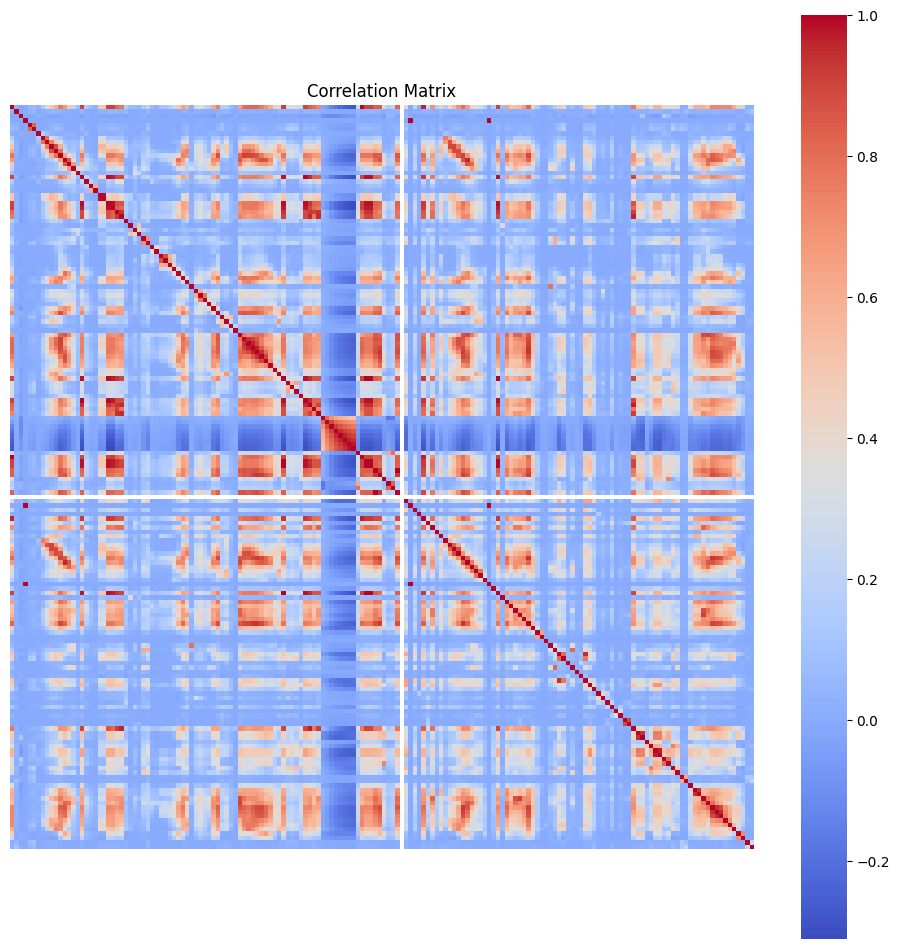

In [8]:
plt.figure(figsize=(12, 12))

sns.heatmap(X_train_imputed.corr(), cmap="coolwarm", annot=False, cbar=True,
            xticklabels=False, yticklabels=False, square=True)

plt.title("Correlation Matrix")
plt.show()

iv. Pick 
√170  features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
signi cance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

In [9]:
highest_cv = np.argsort(cv_df.iloc[2].values)[::-1][:int(math.sqrt(170))]

chosen_features = X_train_imputed.columns[highest_cv]
print('Selected features:')
print(cv_df.iloc[2:, highest_cv].T)


Selected features:
                CV
cs_009  235.277605
cf_000  184.233092
co_000  183.949017
ad_000  183.847620
dh_000  114.984991
dj_000  109.647285
ag_000   91.878565
as_000   86.416904
ay_009   83.786063
az_009   76.967978
ak_000   74.526688
au_000   68.160554
ch_000   58.268229


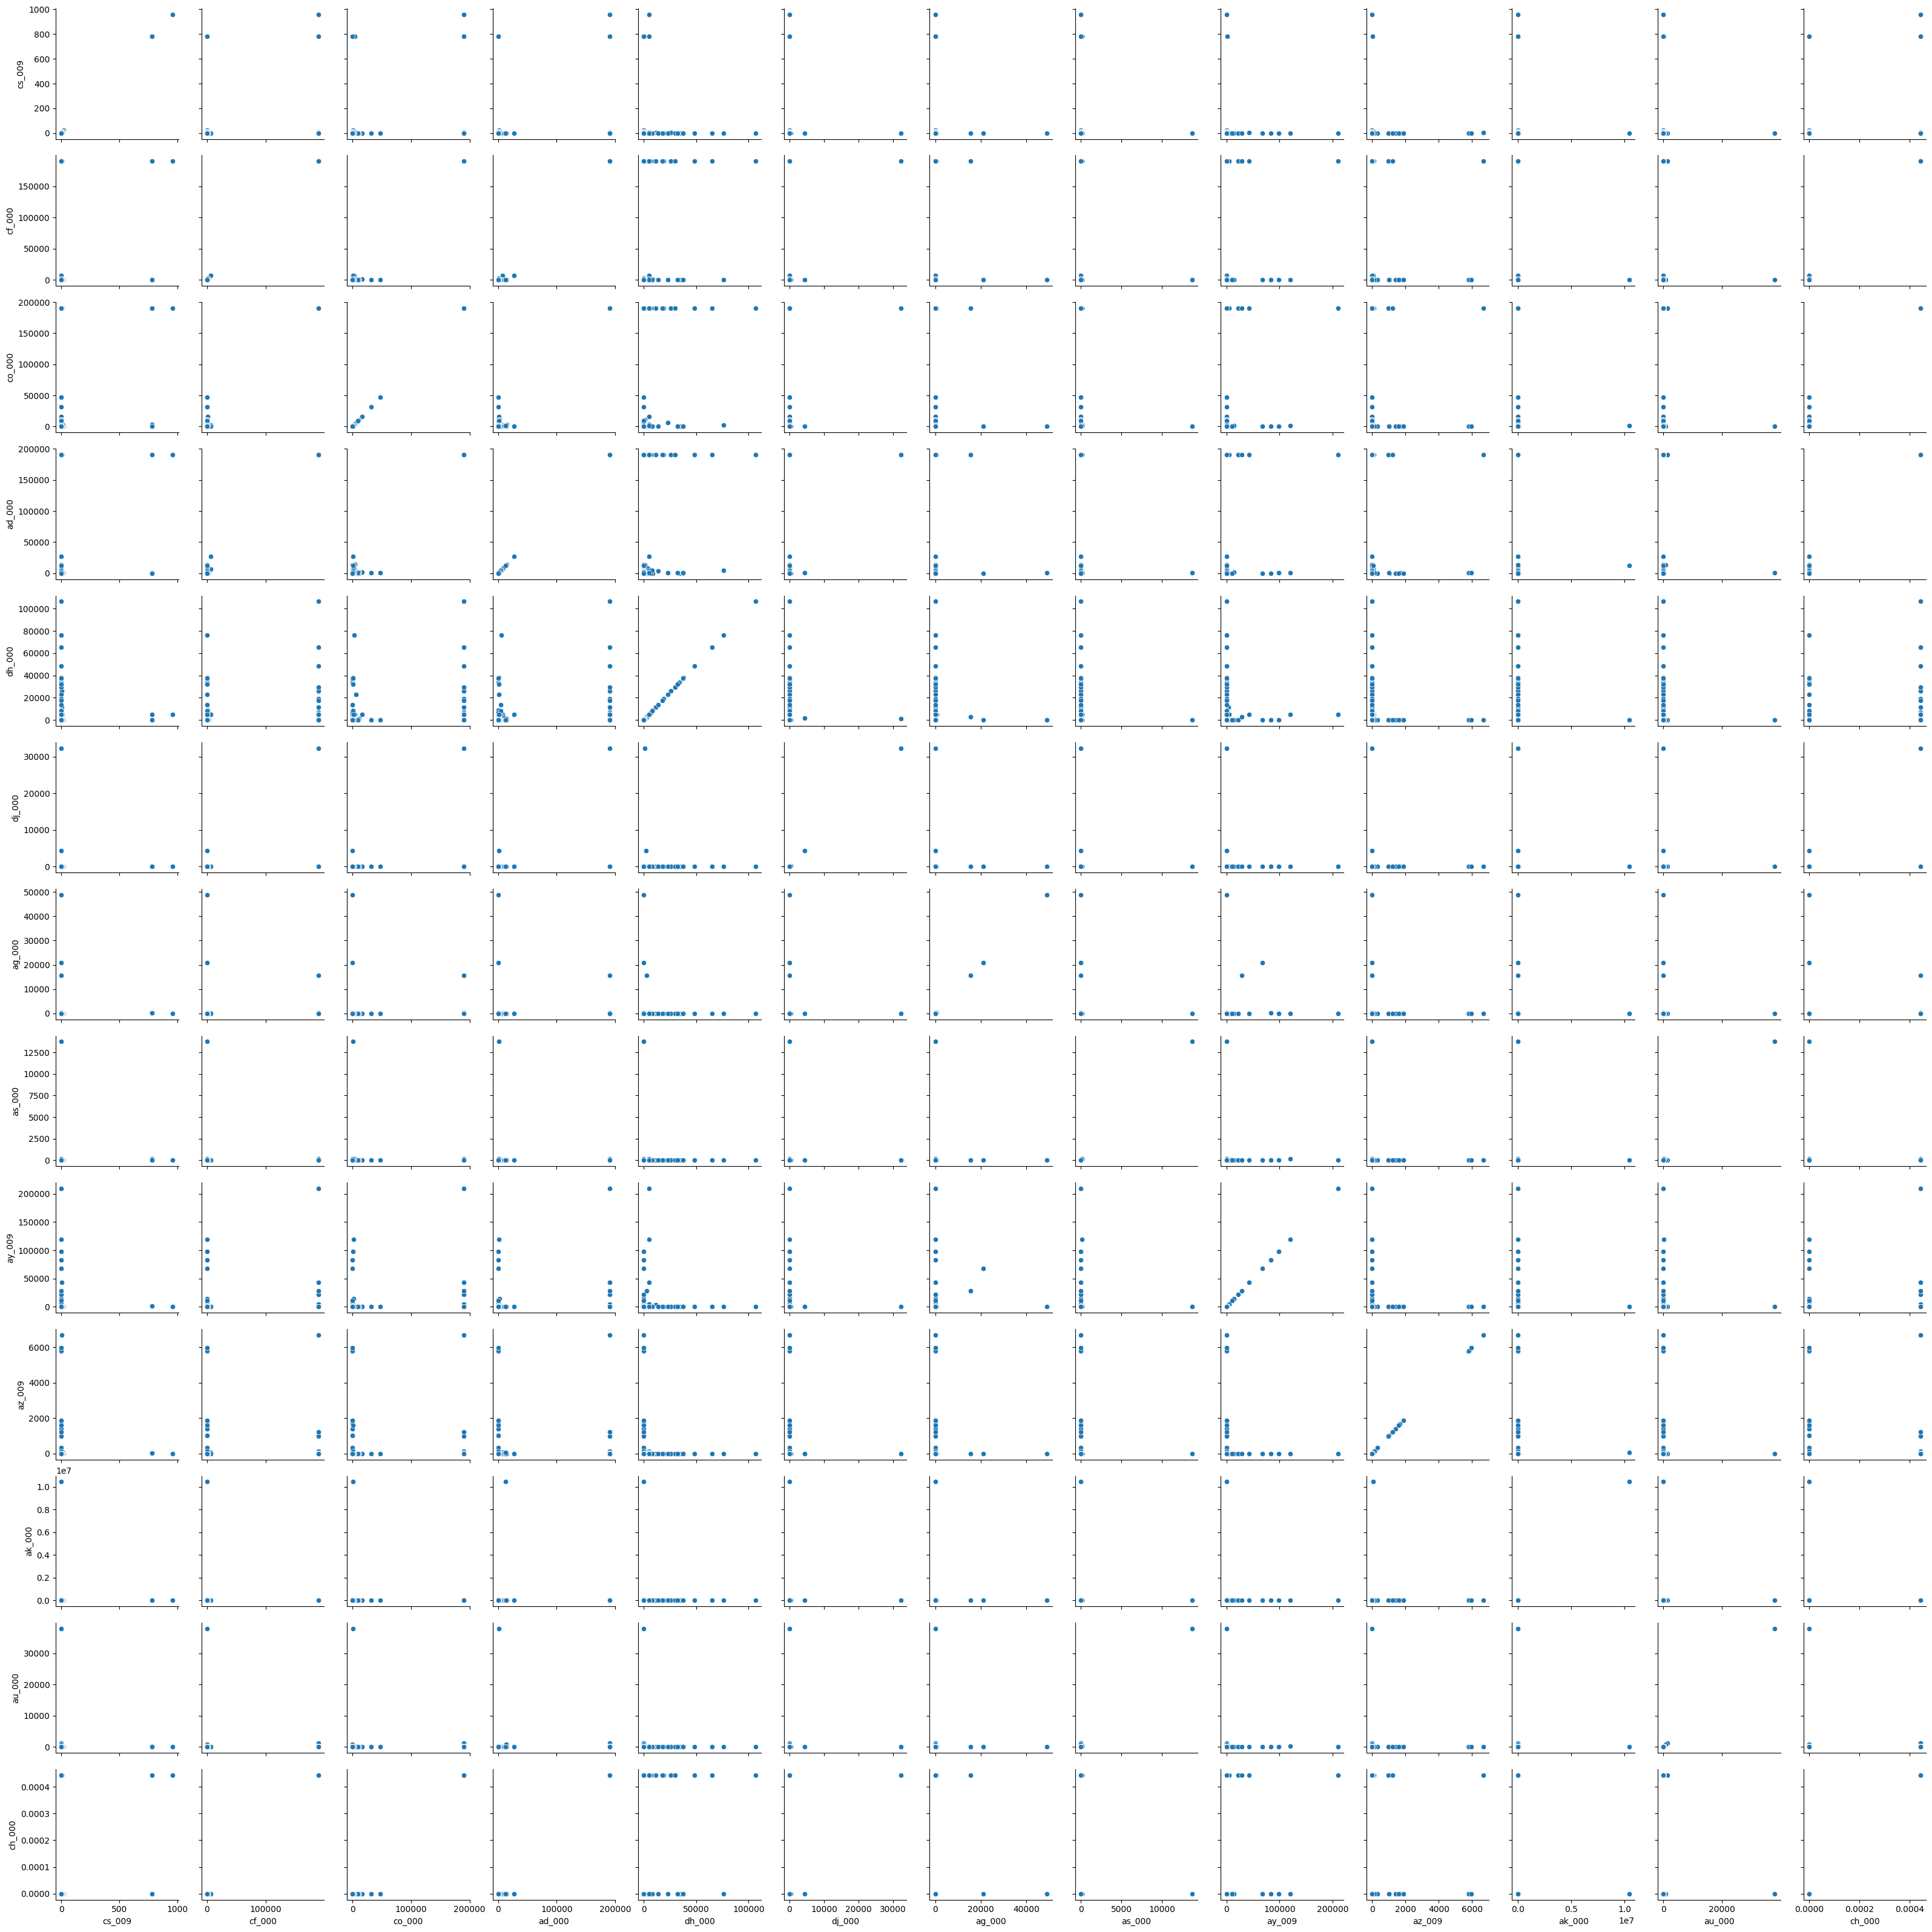

In [10]:
import seaborn as sns

sns.pairplot(data = X_train_imputed[chosen_features].sample(2000), diag_kind = None)

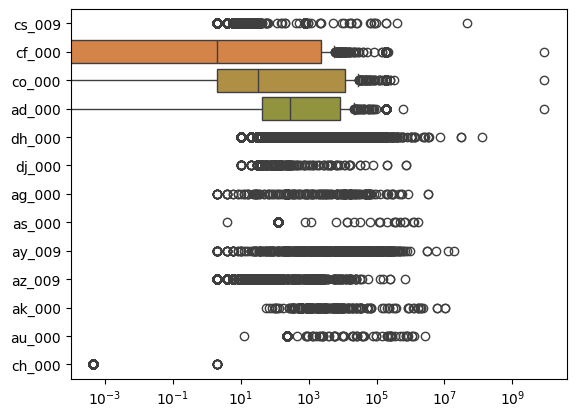

In [11]:
sns.boxplot(data=X_train_imputed[chosen_features], orient='h')

plt.xscale('log')


Conclusion:

We cannot draw any conclusions solely based on the scatterplots. Given that the mean is used as the imputation method, any outliers have the potential to significantly influence the data points.

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [12]:
value_counts = y_train.value_counts()

negative_count = value_counts.get(0, 0)
positive_count = value_counts.get(1, 0)

print(f"Total positive values in datasets[train+test]: {positive_count}")
print(f"Total negative values in datasets[train+test]: {negative_count}")


Total positive values in datasets[train+test]: 1000
Total negative values in datasets[train+test]: 59000


Conclusion : 
Since the number of total negative values is significantly higher than the number of positive values

##### The dataset is highly imbalanced

(c) Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassi cation for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.

Confusion Matrix for Random Forest:
[[58972    28]
 [  450   550]]

Random Forest Accuracy: 0.99203
Random Forest Error Rate: 0.00797


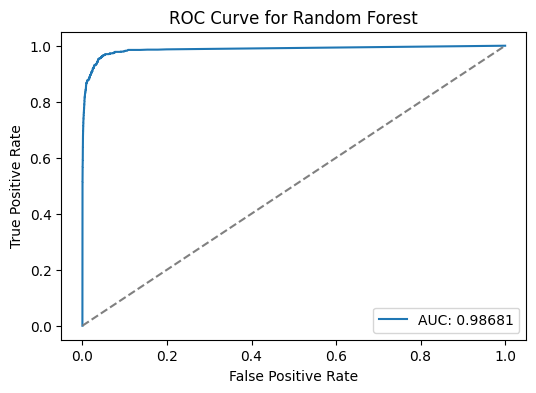

Evaluation Summary for the Model: {'conf_matrix': array([[58972,    28],
       [  450,   550]]), 'accuracy': 0.99203, 'error_rate': 0.00797}


In [13]:
##chatgpt :  how to create basic random forest model using pROC package

def plot_roc_curve(true_labels, predicted_probs, plot_title):
    fig, axis = plt.subplots(figsize=(6, 4))
    axis.set_title(f"ROC Curve for {plot_title}")
    
    positive_class_probs = predicted_probs[:, 1]
    
    fpr, tpr, _ = roc_curve(true_labels, positive_class_probs)
    
    auc_score = auc(fpr, tpr)
    
    axis.plot(fpr, tpr, label=f"AUC: {round(auc_score, 5)}")
    
    axis.plot([0, 1], [0, 1], linestyle="--", color="grey")
    
    axis.set_xlabel("False Positive Rate")
    axis.set_ylabel("True Positive Rate")
    axis.legend()
    
    plt.show()

def evaluate_model(true_labels, predicted_labels, predicted_probs, model_name, is_xgboost=False):
    conf_matrix_result = confusion_matrix(true_labels, predicted_labels)
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix_result}\n")
    
    accuracy = round(accuracy_score(true_labels, predicted_labels), 5)
    error_rate = 1 - accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Error Rate: {round(error_rate, 5)}")
    
    if is_xgboost:
        roc_auc = round(roc_auc_score(true_labels, predicted_labels), 5)
        print(f"ROC AUC for {model_name}: {roc_auc}")
    
    plot_roc_curve(true_labels, predicted_probs, model_name)
    
    evaluation_metrics = {
        'conf_matrix': conf_matrix_result,
        'accuracy': accuracy,
        'error_rate': round(error_rate, 5)
    }
    if is_xgboost:
        evaluation_metrics['roc_auc'] = roc_auc
    
    return evaluation_metrics

def train_random_forest_classifier(X_train, y_train, use_balanced_class_weights=False):
    model = RandomForestClassifier(
        max_depth=5,
        random_state=60000,
        oob_score=True,
        class_weight='balanced' if use_balanced_class_weights else None
    )
    model.fit(X_train, y_train)
    return model

def train_and_evaluate_model(X_train, y_train, model_name="Random Forest", use_balanced_weights=False):
    model = train_random_forest_classifier(X_train, y_train, use_balanced_weights)
    
    predicted_labels = model.predict(X_train)
    predicted_probs = model.predict_proba(X_train)
    
    evaluation_results = evaluate_model(y_train, predicted_labels, predicted_probs, model_name)
    
    return model, evaluation_results

y_train_data = y_train
trained_model, evaluation_summary = train_and_evaluate_model(X_train_imputed, y_train_data)

print(f"Evaluation Summary for the Model: {evaluation_summary}")


Confusion Matrix for Random Forest:
[[15610    15]
 [   94   281]]

Random Forest Accuracy: 0.99319
Random Forest Error Rate: 0.00681


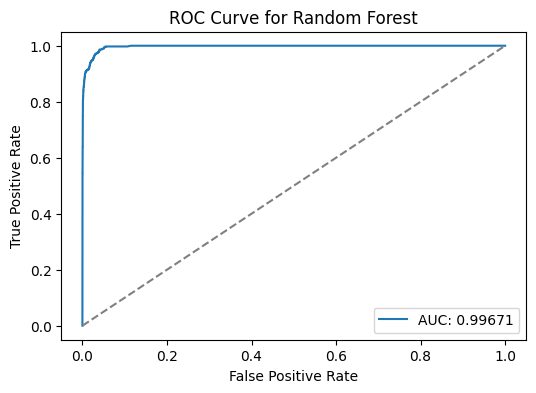

Evaluation Summary for the Test Set: {'conf_matrix': array([[15610,    15],
       [   94,   281]]), 'accuracy': 0.99319, 'error_rate': 0.00681}


In [14]:
y_test_data = y_test
trained_model, evaluation_summary_test = train_and_evaluate_model(X_test_imputed, y_test_data)
print(f"Evaluation Summary for the Test Set: {evaluation_summary_test}")


In [15]:
train_oob_error = round(1 - trained_model.oob_score_, 5)

y_test_predicted = trained_model.predict(X_test_imputed)
test_error = round(1 - accuracy_score(y_test_data, y_test_predicted), 5)

print(f"Train Out Of Bag Error: {train_oob_error}")
print(f"Test Error: {test_error}")


Train Out Of Bag Error: 0.012
Test Error: 0.00681


(d) Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 1c. Compare the results with
those of 1c.

[1] Class Weighting: Assign higher weights to the minority class so the model gives it more importance, reducing bias toward the majority class.

[2] Resampling:

Oversampling: Increase the number of minority class samples (e.g., using SMOTE).

Undersampling: Reduce the number of majority class samples to balance the dataset.

[3] Balanced Random Forests (BRF): Each tree is trained on a balanced subset of the data, typically by undersampling the majority class within each bootstrap sample.

[4] Cost-sensitive Learning: Adjust the model's splitting criterion to impose a higher penalty for misclassifying the minority class.

Confusion Matrix for Random Forest:
[[56563  2437]
 [   31   969]]

Random Forest Accuracy: 0.95887
Random Forest Error Rate: 0.04113


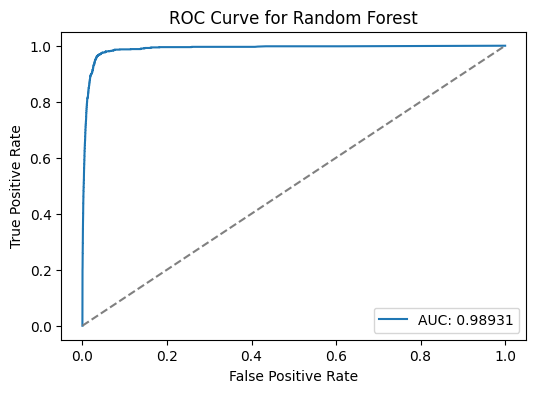

Evaluation Summary for the Training Set: {'conf_matrix': array([[56563,  2437],
       [   31,   969]]), 'accuracy': 0.95887, 'error_rate': 0.04113}


In [16]:
y_train_data = y_train
trained_model, evaluation_summary_train = train_and_evaluate_model(X_train_imputed, y_train_data, use_balanced_weights=True)

print(f"Evaluation Summary for the Training Set: {evaluation_summary_train}")


Confusion Matrix for Random Forest:
[[15610    15]
 [   94   281]]

Random Forest Accuracy: 0.99319
Random Forest Error Rate: 0.00681


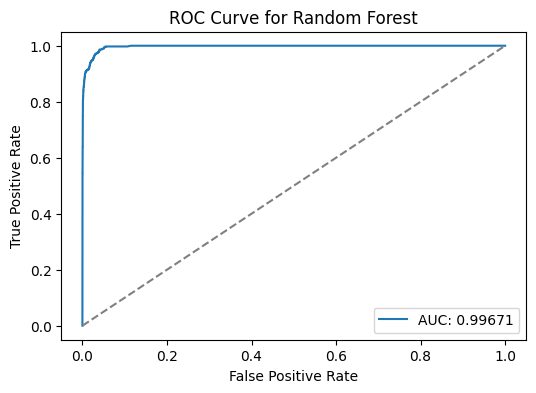

Evaluation Summary for the Testing Set: {'conf_matrix': array([[15610,    15],
       [   94,   281]]), 'accuracy': 0.99319, 'error_rate': 0.00681}


In [17]:
y_test_data = y_test
test_model, evaluation_summary_test = train_and_evaluate_model(X_test_imputed, y_test_data)

print(f"Evaluation Summary for the Testing Set: {evaluation_summary_test}")


In [18]:
y_test_predicted = trained_model.predict(X_test_imputed)

train_oob_error = round(1 - trained_model.oob_score_, 5)

test_error = round(1 - accuracy_score(y_test_data, y_test_predicted), 5)
print(f"Train Out Of Bag Error: {train_oob_error}")
print(f"Testing Error: {test_error}")


Train Out Of Bag Error: 0.04245
Testing Error: 0.04038


Conclusion : 

With imbalanced data, the model accurately predicts the negative class, leading to high overall accuracy due to the large number of negative samples. However, its performance on the positive class is quite poor.

When the data is balanced, the model performs much better, especially in predicting the positive class.

(e) XGBoost and Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general.

In [19]:
## chatgpt : how to create a binary logistic classifier for an XGBoost model

from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

param_search = {
    "reg_alpha": [0.01, 0.05, 0.06, 0.07, 0.09, 0.1, 0.2]
}

def optimize_and_train_xgb(X_train, y_train, param_search):
    
    model = XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, 
                      learning_rate=0.1, max_depth=5)

    
    grid_search = GridSearchCV(model, param_search, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                               scoring="accuracy", n_jobs=-1)

    grid_search.fit(X_train, y_train)
    best_param = grid_search.best_params_['reg_alpha']
    return grid_search, best_param

def assess_xgb_performance(X_train, y_train, X_test, y_test, best_param):
    
    model = XGBClassifier(objective='binary:logistic', reg_alpha=best_param, colsample_bytree=0.3, 
                          learning_rate=0.1, max_depth=5, use_label_encoder=False)
    
    model.fit(X_train, y_train)

    
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)
    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    
    evaluation_results = {}
    evaluation_results['train'] = evaluate_model(y_train.values, train_preds, train_probs, "Training", is_xgboost=True)
    evaluation_results['test'] = evaluate_model(y_test, test_preds, test_probs, "Testing", is_xgboost=True)
    
    return evaluation_results

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

grid_search_results, optimal_param = optimize_and_train_xgb(X_train_scaled, y_train, param_search)

print(f"Optimal Regularization Alpha: {optimal_param}")
print(f"Best Cross-Validation Training Accuracy: {round(grid_search_results.best_score_, 5)}")


Optimal Regularization Alpha: 0.05
Best Cross-Validation Training Accuracy: 0.99402


/opt/anaconda3/envs/dsci552/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:19:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix for Training:
[[58994     6]
 [   93   907]]

Training Accuracy: 0.99835
Training Error Rate: 0.00165
ROC AUC for Training: 0.95345


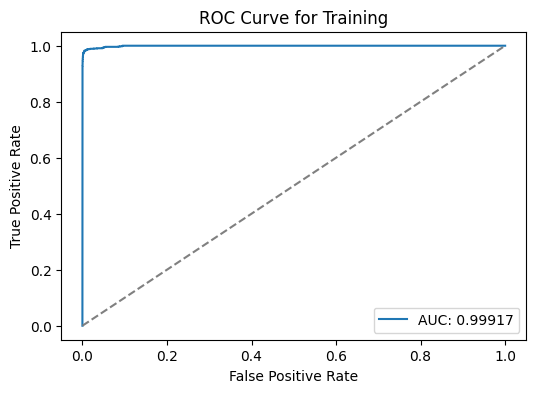

Confusion Matrix for Testing:
[[15609    16]
 [   96   279]]

Testing Accuracy: 0.993
Testing Error Rate: 0.007
ROC AUC for Testing: 0.87149


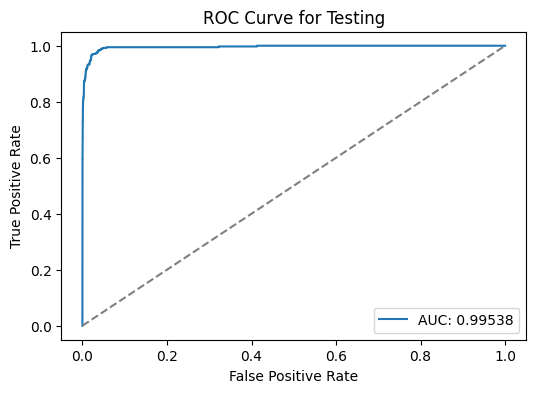

In [20]:
performance_stats = assess_xgb_performance(X_train_scaled, y_train, X_test_scaled, y_test, optimal_param)

performance_stats['best_alpha_value'] = optimal_param


(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print("Original Class Distribution:")
print(y_train.value_counts())

print("\nResampled Class Distribution after using SMOTE:")
print(y_train_resampled.value_counts())


Original Class Distribution:
class
0    59000
1     1000
Name: count, dtype: int64

Resampled Class Distribution after using SMOTE:
class
0    59000
1    59000
Name: count, dtype: int64


In [22]:
grid_search, optimal_alpha = optimize_and_train_xgb(x_train_resampled, y_train_resampled, param_search)
print(f"Optimal alpha value: {optimal_alpha}")
print(f"Best cross-validation accuracy: {round(grid_search.best_score_, 5)}")


Optimal alpha value: 0.01
Best cross-validation accuracy: 0.99399


/opt/anaconda3/envs/dsci552/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:20:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix for Training:
[[58612   388]
 [  100 58900]]

Training Accuracy: 0.99586
Training Error Rate: 0.00414
ROC AUC for Training: 0.99586


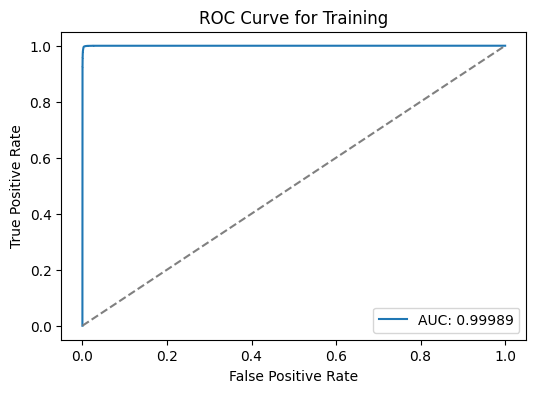

Confusion Matrix for Testing:
[[15483   142]
 [   45   330]]

Testing Accuracy: 0.98831
Testing Error Rate: 0.01169
ROC AUC for Testing: 0.93546


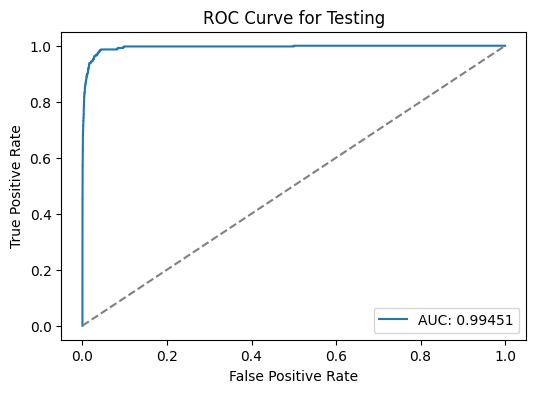

In [23]:
stats_smote = assess_xgb_performance(x_train_resampled, y_train_resampled, X_test_scaled, y_test, optimal_param)

stats_smote['best_alpha'] = optimal_param


In [24]:
results = [
    [performance_stats['train']['error_rate'], performance_stats['train']['accuracy'], performance_stats['train']['roc_auc'], 
     performance_stats['test']['error_rate'], performance_stats['test']['accuracy'], performance_stats['test']['roc_auc']],
    [stats_smote['train']['error_rate'], stats_smote['train']['accuracy'], stats_smote['train']['roc_auc'], 
     stats_smote['test']['error_rate'], stats_smote['test']['accuracy'], stats_smote['test']['roc_auc']]
]

performance_df = pd.DataFrame(results, columns=['Train Error Rate', 'Train Accuracy', 'Train ROC AUC', 'Test Error Rate', 'Test Accuracy', 'Test ROC AUC'])
performance_df.index = ['Model without SMOTE', 'Model with SMOTE']

performance_df


Train Error Rate  Train Accuracy  Train ROC AUC  \
Model without SMOTE           0.00165         0.99835        0.95345   
Model with SMOTE              0.00414         0.99586        0.99586   

                     Test Error Rate  Test Accuracy  Test ROC AUC  
Model without SMOTE          0.00700        0.99300       0.87149  
Model with SMOTE             0.01169        0.98831       0.93546

2. ISLR 6.6.3

(a) Steadily Decrease: As we increase the value of *s* from 0 to infinity, we are loosening the constraints on *s*, which means we are moving from underfitting toward overfitting. As a result, the training RSS will gradually decrease.

(b) Decrease initially, and then eventually start increasing in a
U shape :  As we move from an underfit model to an overfit model, the testing RSS will first decrease and then increase as the model becomes overfit.

(c) Steadily Increases: Initially, β is nearly zero, indicating minimal variance at the start. As a result, the variance will increase as we move from s = 0 to s = ∞.

(d) Steadily Decrease: As variance increases, bias decreases. This represents the fundamental trade-off between bias and variance.

(e) Remain constant : Irreducible error is the "act of god"/any error that cannot be explained by the ML model and cannot be reduced, changed or controlled by any ML model

3. ISLR, 6.6.5

(a) We'll write the optimization problem as : by $x_{11} = x_{12} = x_1$ and $x_{21} = x_{22} = x_2$

$$
(y_1 - \hat{\beta}_1 x_1 - \hat{\beta}_2 x_1)^2 + (y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2)^2 + \lambda(\hat{\beta}^2_1+ \hat{\beta}^2_2)
$$


(b) We can argue that for this, $\hat{\beta}_1 = \hat{\beta}_2$

We'll then take partial derivative wrt to $\hat{\beta}_1 and \hat{\beta}_2$ and then set both of them to zero


$$
\begin{align*}
\frac{\partial}{\partial \hat{\beta}_1} 
    &= \hat{\beta}_1 (x^2_1 - x^2_1 + \lambda) + \hat{\beta}_2 (x^2_1 + x^2_2) - y_1 x_1 - y_2 x_2 \\
\frac{\partial}{\partial \hat{\beta}_2} 
    &= \hat{\beta}_1 (x^2_1 - x^2_1) + \hat{\beta}_2 (x^2_1 + x^2_2 + \lambda) - y_1 x_1 - y_2 x_2 
\end{align*}
$$

If we set both of these equations equal to zero and then move $(- y_1 x_1 - y_2 x_2)$ on the left side, we'll get $\hat{\beta}_1 = \hat{\beta}_2$

(c) We'll do the same thing we did in part (a); then the lasso optimization problem is :

$$
(y_1 - \hat{\beta}_1 x_1 - \hat{\beta}_2 x_1)^2 + (y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2)^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|)
$$

(d) The solution to the lasso coefficients is not unique because the constraints of the lasso create a diamond-shaped region in the graph. By performing some algebra, we can observe that the lasso solution can be found by a line intersecting this region. This shows that the lasso solution is not unique.

4. ISLR 8.4.5

Using the majority vote method for this problem, we observe that there are 6 votes for Red and 4 votes for Green. Since Red has the majority, we classify X as Red.

The average probability for the Red class, based on the given probabilities, is 0.45. Therefore, we classify X as Green.

5. ISLR 9.7.3

(a) 

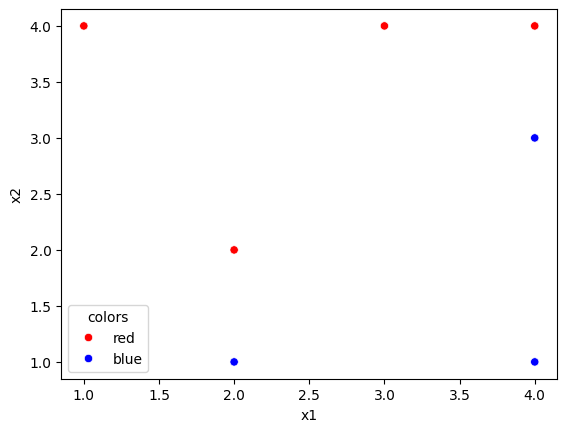

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = [
    [3, 4, "red"],
    [2, 2, "red"],
    [4, 4, "red"],
    [1, 4, "red"],
    [2, 1, "blue"],
    [4, 3, "blue"],
    [4, 1, "blue"]
]

df_q5 = pd.DataFrame(data, columns=["x1", "x2", "colors"])

sns.scatterplot(data=df_q5, x='x1', y='x2', hue='colors', palette=['red', 'blue'])
plt.show()


(b)

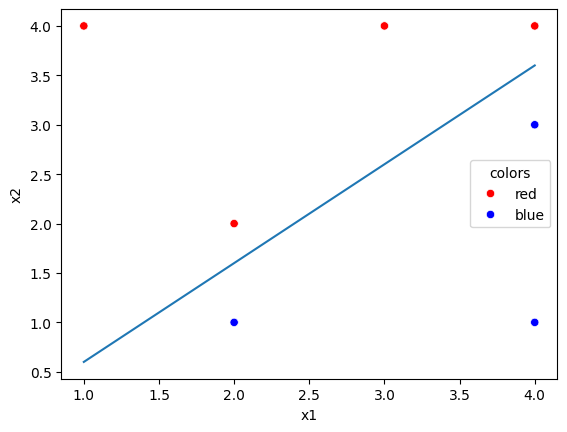

In [26]:
x = [1, 2, 3, 4]
y_b = [i-0.4 for i in x]
plt.plot(x, y_b)
sns.scatterplot(data=df_q5, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

The diagonal line given by using $x_2 = x_1 - 0.4$ looks like a good seperating hyperplane

(c)

We can write the classifier as $f(X) = 0.4 - X_1 + X_2$

Here, if $f(X)$ is greater that zero, we classify to red else we classify to blue

(d)

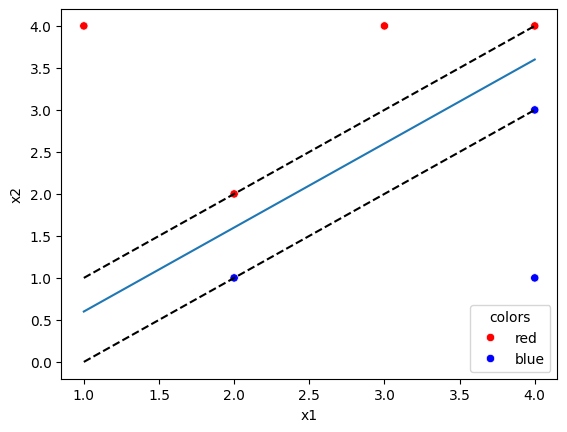

In [27]:
x__ = [1, 2, 3, 4]
y_ = [i-0.4 for i in x]
yd_1 = [i-1 for i in x]
yd_2 = [i for i in x]
plt.plot(x__, y_)
plt.plot(x__, yd_1, 'k--')
plt.plot(x__, yd_2, 'k--')
sns.scatterplot(data=df_q5, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

(e)

The support vector here is Red: $(2, 2)$ and $(4, 4)$ and Blue: $(2, 0.8)$ and $(4, 2.7)$.

(f)

The seventh point is distant from the maximal margin hyperplane. Although it could influence the decision boundary if it were near the edge, it does not have any effect in this case.

(g)

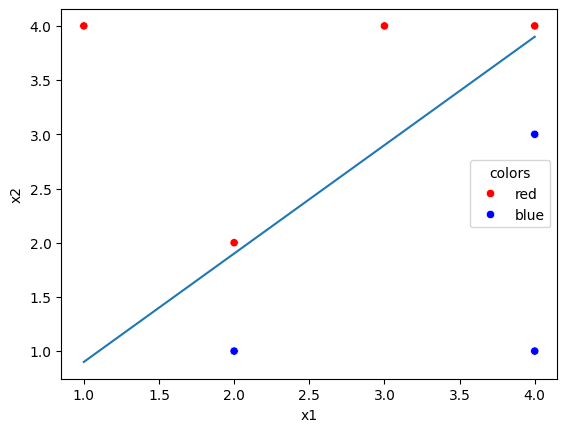

In [28]:
x = [1, 2, 3, 4]
y_g = [1.0*i-0.1 for i in x]
plt.plot(x, y_g)
sns.scatterplot(data=df_q5, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

The equation for the other hyperplane which is not the optimal seperating hyperplane is $X_2 = 1.0 \cdot X_1 - 0.1$

(h)

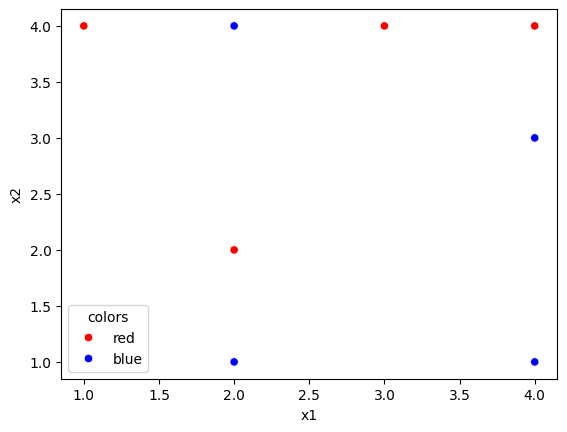

In [29]:
x1_new = [3, 2, 4, 1, 2, 4, 4, 2]
x2_new = [4, 2, 4, 4, 1, 3, 1, 4]
colors = ["red", "red", "red", "red", "blue", "blue", "blue", "blue"]
df_obs = pd.DataFrame(dict(x1=x1_new, x2=x2_new, colors=colors))
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

## References : 

https://www.geeksforgeeks.org/imbalanced-learn-module-in-python/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://xgboost.readthedocs.io/en/stable/python/python_intro.html

https://www.datacamp.com/tutorial/xgboost-in-python